# Amostragem

Renato Naville Watanabe

## Preparação do ambiente

In [2]:
# @title
try:
  from google.colab import output
  output.enable_custom_widget_manager()
  IN_COLAB = True
except:
  IN_COLAB = False

if IN_COLAB:
  !pip install ipympl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 39.1 MB/s eta 0:00:00


In [3]:
# @title
import sympy as sym
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
from scipy.signal import bode
%matplotlib widget

## Definição

Aqui vamos fazer a ligação entre domínio de tempo contínuo com o domínio de tempo discreto. Nos dias de hoje, praticamente todo processamento de sinais é feito com o auxílio de computadores. Computadores, como é bem conhecido, guardam apenas uma quantidade finita de informação. Quando se trata de sinais, isso quer dizer que quando trabalhamos com sinais utilizado computadores, não é possível armazenar todos os valores do sinal. São armazenados apenas alguns valores. Ou seja, ao trabalharmos com computadores, somos obrigados a trabalhar em tempo discreto. Por isso é importante saber em que condições podemos passar um sinal de tempo contínuo para tempo discreto.  Para exemplificar vamos considerar o seguinte sinal:

$x(t) = \cos(2\pi t)$

Esse sinal tem o seguinte gráfico:

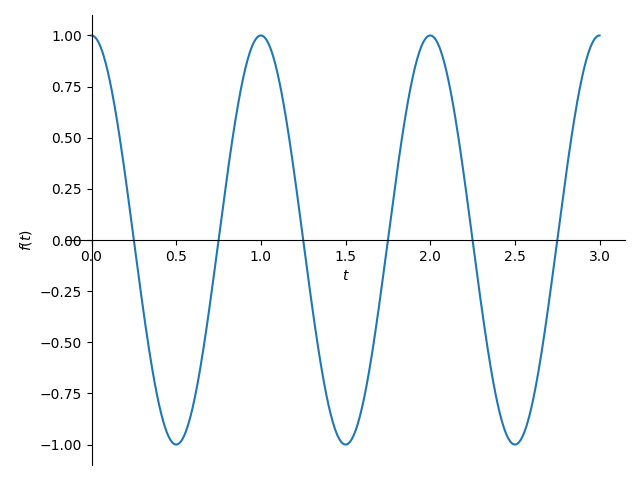

In [4]:
# @title
t = sym.symbols('t')
sym.plot(sym.cos(2*np.pi*t), (t, 0,3))

Ao discretizarmos o sinal, vamos pegar apenas alguns pontos do sinal original.

$x[n] = x(nT_s)$

em que $T_s$ é uma constante conhecida como **período de amostragem**. Por exemplo, se escolhermos $T_s=0.1$ s, o sinal $x[n]$ fica como indicado no gráfico abaixo (no gráfico abaixo, a linha contínua é o sinal no tempo contínuo e o sinal em tempo discreto é mostrado com barras):

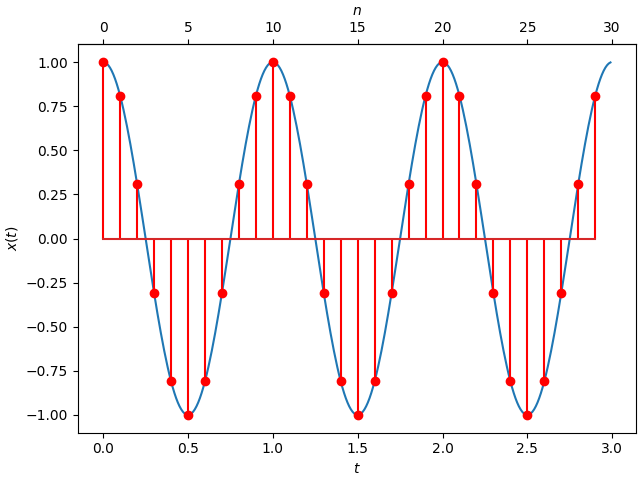

In [5]:
# @title
n = np.arange(30)
t = np.arange(0, 300)*0.01
Ts = 0.1
xd = np.cos(2*np.pi*n*Ts)
xc = np.cos(2*np.pi*t)
# Create some mock data
fig, ax = plt.subplots(layout='constrained')
ax.plot(t, xc)
ax.stem(n*Ts, xd, 'r')
ax.set_xlabel('$t$')
ax.set_ylabel('$x(t)$')

def time2n(x):
    return x /Ts


def n2time(x):
    return x * Ts


secax = ax.secondary_xaxis('top', functions=(time2n, n2time))
secax.set_xlabel('$n$')
plt.show()

Note que existe uma correspondência entre o tempo discreto $n$ e o tempo contínuo $t$:

$t = n\cdot Ts$


Perceba que se olharmos apenas o sinal de tempo discreto, podemos reconstruir na nossa cabeça o cosseno original. Isso não acontece se utilizarmos, por exemplo $T_s=0.7$ s:

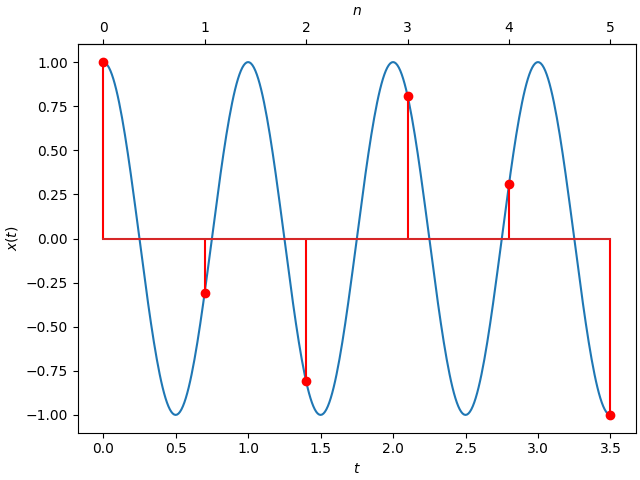

In [6]:
# @title
n = np.arange(6)
t = np.arange(0, 350)*0.01
Ts = 0.7
xd = np.cos(2*np.pi*n*Ts)
xc = np.cos(2*np.pi*t)
# Create some mock data
fig, ax = plt.subplots(layout='constrained')
ax.plot(t, xc)
ax.stem(n*Ts, xd, 'r')
ax.set_xlabel('$t$')
ax.set_ylabel('$x(t)$')

def time2n(x):
    return x /Ts


def n2time(x):
    return x * Ts


secax = ax.secondary_xaxis('top', functions=(time2n, n2time))
secax.set_xlabel('$n$')
plt.show()

Ao tentar reconstruir um cosseno a partir do sinal de tempo discreto, imaginamos um cosseno bem mais lento do que o do sinal original. Então a pergunta é: *qual o período de amostragem máximo que podemos usar para discretizar um sinal de tempo contínuo de forma que após a discretização podemos obter de volta o sinal de tempo contínuo?* Normalmente, essa pergunta é feita em termos de outra grandeza que não o período de amostragem: a **frequência de amostragem**, definida como:

$f_s = \frac{1}{T_s}$.

Então a pergunta é: *qual a frequência de amostragem mínima que podemos usar para discretizar um sinal de tempo contínuo de forma que após a discretização podemos obter de volta o sinal de tempo contínuo?* Isso é respondido com o teorema de Nyquist.

---

### Exemplo 1

Desejamos amostrar o seguinte sinal:

$x(t) = \mathrm{sinc}(3t) = \frac{\mathrm{sen}(3\pi t)}{3\pi t}$

Vamos usar um período de amostragem $T_s=0.05$ s. O sinal discretizado fica:

$x[n] = x(n0.05) = \mathrm{sinc}(3n0.05) = \frac{\mathrm{sen}(0.15\pi n)}{0.15\pi n}$

O gráfico do sinal discretizado é mostrado abaixo:



<ipython-input-7-7808bbec14c9>:3: RuntimeWarning: invalid value encountered in divide
  x = np.sin(0.15*np.pi*n)/(0.15*np.pi*n)


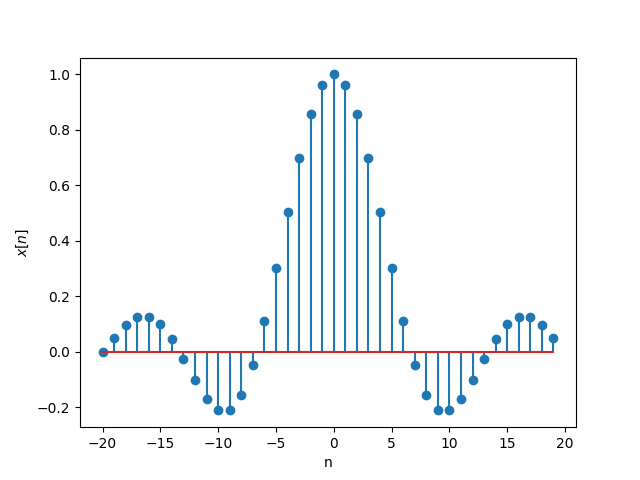

In [7]:
# @title
n = np.arange(-20,20)
x = np.sin(0.15*np.pi*n)/(0.15*np.pi*n)
x[n==0] = 1
plt.figure()
plt.stem(n, x)
plt.xlabel('n')
plt.ylabel('$x[n]$')
plt.show()

## Teorema de Nyquist

O **teorema de Nyquist**, também conhecido como **teorema da amostragem** ou **teorema de Shannon** responde a pergunta do final da seção anterior.

Vamos começar com um sinal $x(t)$ que queremos discretizar. Consideramos que o espectro desse sinal $x(t)$, $X(j\omega)$ tem uma banda limitada $B$ Hz. Isso significa que o espectro de $x(t)$ é igual a zero para $|\omega|>2\pi B$, como por exemplo o espectro mostrado no gráfico abaxo. Para facilitar o enetndimento, os gráficos serão mostrados com eixo da frequência em Hz:

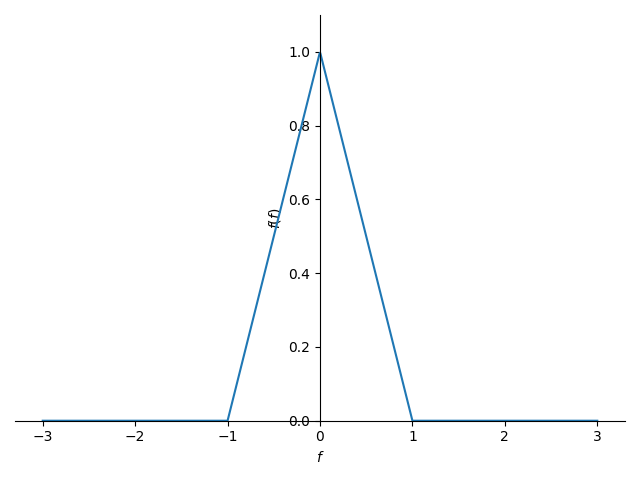

In [8]:
# @title
omega = sym.symbols('f')
B = 1
H = (1-omega)*(sym.Heaviside(omega)-sym.Heaviside(omega-1)) + (1+omega)*(sym.Heaviside(omega+1)-sym.Heaviside(omega))
p1=sym.plot(H, (omega, -3, 3), ylim=[0,1.1], axis_center=None)
fig = p1._backend.fig
ax = p1._backend.ax
ax.set_xticks([-B, B])
ax.set_xticklabels([r'$-B$', r'$B$'])
ax.set_yticks([])
ax.set_yticklabels([])
fig.canvas.draw_idle()

Uma forma de vermos a discretização de um sinal de tempo contínuo é como a multiplicação do sinal $x(t)$ por um trem de impulsos com período $T_s$ ($\Delta_{T_s}(t)$), como exemplificado na figura abaixo:

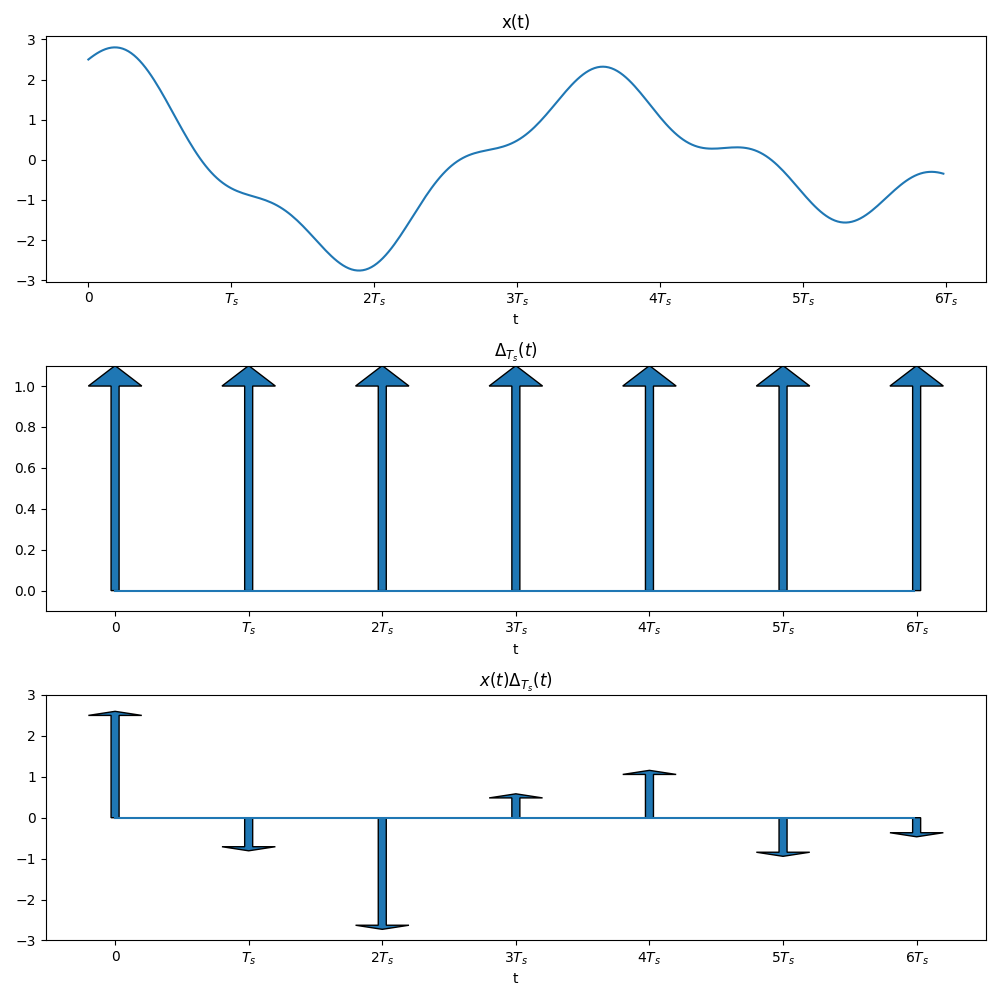

In [ ]:
# @title
t = np.arange(300)*0.01
plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
plt.plot(t, np.cos(4*t)+1.5*np.cos(np.pi*t)+0.5*np.sin(8*np.sqrt(2)*t))
plt.title('x(t)')
plt.xticks([0, 0.5,1,1.5, 2, 2.5, 3], ['0', '$T_s$', '$2T_s$','$3T_s$', '$4T_s$','$5T_s$', '$6T_s$'])
plt.xlabel('t')
plt.subplot(3,1,2)
plt.plot(t, 0*t)
for i in range(7):
    plt.arrow(0.5*i,0,0,1,width=0.03, head_width = 0.2, head_length=0.1)
plt.xticks([0, 0.5,1,1.5, 2, 2.5, 3], ['0', '$T_s$', '$2T_s$','$3T_s$', '$4T_s$','$5T_s$', '$6T_s$'])

plt.ylim(-0.1, 1.1)
plt.xlabel('t')
plt.title('$\Delta_{T_s}(t)$')
plt.subplot(3,1,3)
plt.plot(t, 0*t)
for i in range(7):
    plt.arrow(0.5*i,0,0,np.cos(4*i*0.5)+1.5*np.cos(np.pi*i*0.5)+0.5*np.sin(8*np.sqrt(2)*i*0.5),width=0.03, head_width = 0.2, head_length=0.1)
plt.ylim(-3, 3)
plt.xlabel('t')
plt.xticks([0, 0.5,1,1.5, 2, 2.5, 3], ['0', '$T_s$', '$2T_s$','$3T_s$', '$4T_s$','$5T_s$', '$6T_s$'])
plt.title('$x(t)\Delta_{T_s}(t)$')
plt.tight_layout(pad=1.0)
plt.show()

Após a multiplicação de $x(t)$ pelo trem de impulsos $\Delta_{T_s}(t)$ temos:

$x_a(t) = x(t)\Delta_{T_s}(t)$

O sinal $x_a(t)$ é uma multiplicação de dois sinais. Logo o espectro de $x_a(t)$ é a convolução entre os espectros de $x_a(t)$ e $\Delta_{T_s}(t)$:

$X_a(j\omega) = \frac{1}{2\pi}X(j\omega)*\Lambda(j\omega)$

em que $\Lambda(j\omega)$ é a transformada de Fourier do trem de impulsos.

Aqui estamos supondo que conhecemos $X(j\omega)$. Resta saber a transformada de Fourier do trem de impulsos. O trem de impulsos é um sinal periódico de período $T_s$. Então precisamos calcular a série de Fourier do sinal. O trem de impulsos $\Delta_{T_s}(t)$ é escrito como:

$\Delta_{T_s}(t) = \displaystyle\sum_{n=-\infty}^\infty \delta(t-nT_s)$

Então a sua série de Fourier é:

$a_k = \displaystyle\frac{1}{T_s}\int_{T_s}\Delta_{T_s}(t)e^{-jk\frac{2\pi}{T_s}t}\,dt = \frac{1}{T_s}\int_{T_s}\sum_{n=-\infty}^\infty \delta(t-nT_s)e^{-jk\frac{2\pi}{T_s}t}\,dt=\frac{1}{T_s}\int_{T_s}\displaystyle\sum_{n=-\infty}^\infty \delta(t-nT_s)e^{-jk\frac{2\pi}{T_s}nT_s}\,dt = \frac{1}{T_s}\int_{T_s}\displaystyle\sum_{n=-\infty}^\infty \delta(t-nT_s)e^{-jk2\pi n}\,dt$

A exponencial $e^{-jk2\pi n}$ que aparece dentro da integral é sempre igual a 1, já que o seu expoente sempre será multiplo de $2\pi$. Então:

$a_k = \frac{1}{T_s}\int_{T_s}\displaystyle\sum_{n=-\infty}^\infty \delta(t-nT_s)\,dt = \frac{1}{T_s}$

Usando a expressão de síntese da série de Fourier, podemos escrever o trem de impulsos como:

$\Delta_{T_s}(t) = \displaystyle\sum_{k=-\infty}^{\infty}\frac{1}{T_s}e^{jk2\pi f_s t}$

Então, a transformada de Fourier de $\Delta_{T_s}(t)$ é:

$\Lambda(j\omega) = \displaystyle\sum_{k=-\infty}^{\infty}\frac{1}{T_s}\delta(\omega-k2\pi f_s)$


Ou seja, a transformada de Fourier de um trem de impulsos é um trem de impulsos, com os pulsos espaçados de $2\pi f_s$.

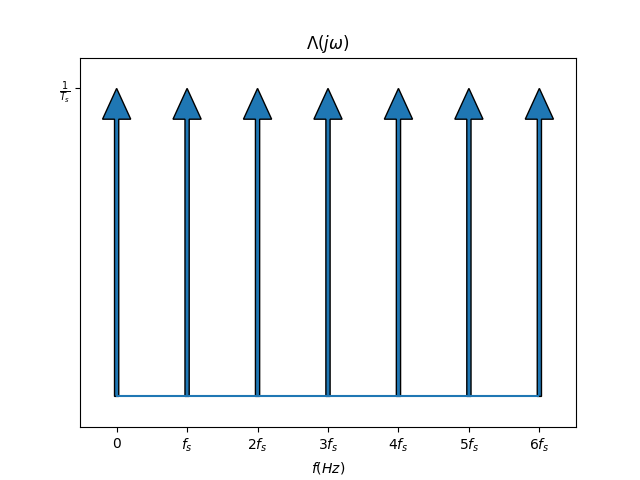

In [ ]:
# @title
omega = np.arange(0, 300)*0.01
plt.figure()
plt.plot(omega, 0*omega)
for i in range(7):
    plt.arrow(0.5*i,0,0,1-0.1,width=0.03, head_width = 0.2, head_length=0.1)
plt.ylim(-0.1, 1.1)
plt.xlabel('$f (Hz)$')
plt.title('$\Lambda(j\omega)$')
plt.xticks([0, 0.5,1,1.5, 2, 2.5, 3], ['0', r'$f_s$', r'$2f_s$',r'$3f_s$',
                                       r'$4f_s$',r'$5f_s$', r'$6f_s$'])
plt.yticks([1], [r'$\frac{1}{T_s}$'])
plt.show()

A convolução de $X(j\omega)$ com um impulso irá deslocar $X(j\omega)$ para ficar centrado na frequência daquele impulso. Então, a convolução com um trem de impulsos irá fazer com que o espectro da multiplicação de $x(t)$ com o trem de impulsos seja $X(j\omega)$ repetido a cada $2\pi f_s$ rad/s, multiplicado por \frac{1}{2\pi T_s}:

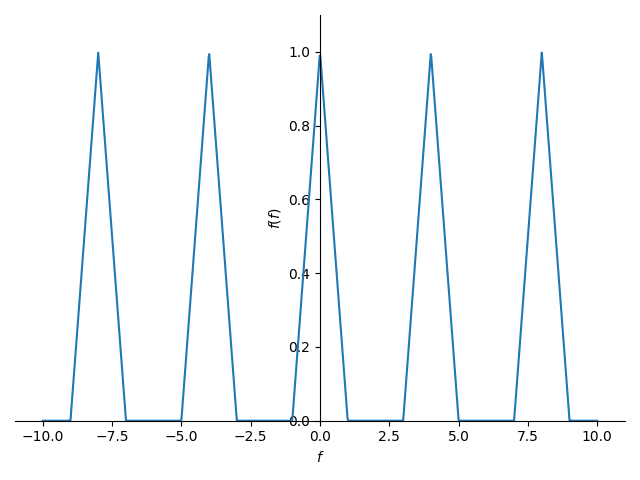

In [10]:
# @title
omega = sym.symbols('f')
B = 1
H = (1-omega)*(sym.Heaviside(omega)-sym.Heaviside(omega-1)) + (1+omega)*(sym.Heaviside(omega+1)-sym.Heaviside(omega))
p1=sym.plot(H+H.subs(omega, omega-4)+H.subs(omega, omega-8)+H.subs(omega, omega+4)+H.subs(omega, omega+8), (omega, -10, 10), ylim=[0,1.1], axis_center=None)
fig = p1._backend.fig
ax = p1._backend.ax
ax.set_xticks([-8, -4, 0, 4, 8])
ax.set_xticklabels([r'$-2f_s$', r'$-f_s$', r'$0$', r'$f_s$', r'$2f_s$'])
ax.set_yticks([1])
ax.set_yticklabels([r'$\frac{1}{2\pi T_s}$'])
fig.canvas.draw_idle()

Perceba que existe um espaço entre as repetições de $X(j\omega)$. Isso só vai acontecer se $fs>2B$.

Nesse caso, se quisermos recuperar o sinal original, basta fazer a convolução desse sinal por um filtro passa-baixa com uma frequência de corte maior do que $B$ e menor do que $f_s-B$.

Caso $fs<2B$, o espectro resultante da multiplicação será:

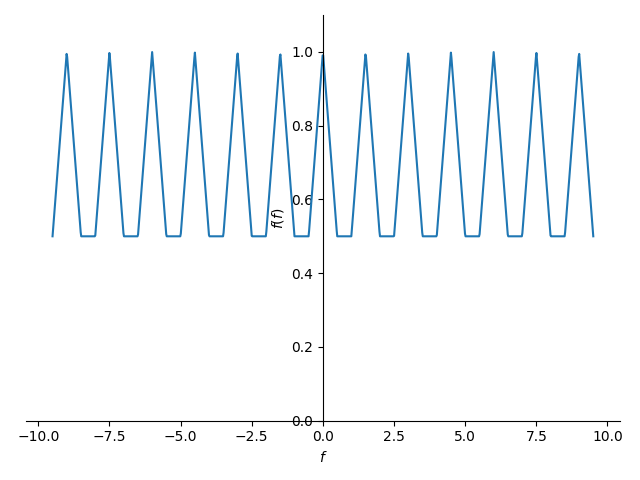

In [12]:
# @title
omega = sym.symbols('f')
B = 1
H = (1-omega)*(sym.Heaviside(omega)-sym.Heaviside(omega-1)) + (1+omega)*(sym.Heaviside(omega+1)-sym.Heaviside(omega))
p1=sym.plot(H+H.subs(omega, omega-1.5)+H.subs(omega, omega-3)+
            H.subs(omega, omega+1.5)+H.subs(omega, omega+3)+
            H.subs(omega, omega+4.5)+H.subs(omega, omega-4.5)+
            H.subs(omega, omega+6)+H.subs(omega, omega-6)+
            H.subs(omega, omega+7.5)+H.subs(omega, omega-7.5)+
            H.subs(omega, omega+9)+H.subs(omega, omega-9)+
            H.subs(omega, omega+11.5)+H.subs(omega, omega-11.5)+
            H.subs(omega, omega+13)+H.subs(omega, omega-13), (omega, -9.5, 9.5), ylim=[0,1.1], axis_center=None)
fig = p1._backend.fig
ax = p1._backend.ax
ax.set_xticks([-9, -7.5, -6, -4.5, -3, -1.5, 0, 1.5, 3, 4.5, 6, 7.5, 9])
ax.set_xticklabels([r'$-6f_s$', r'$-5f_s$',r'$-4f_s$', r'$-3f_s$', r'$-2f_s$', r'$-1f_s$',
                    r'$0$', r'$f_s$', r'$2f_s$', r'$3f_s$', r'$4f_s$',r'$5f_s$', r'$6f_s$',])
ax.set_yticks([1])
ax.set_yticklabels([r'$\frac{1}{2\pi T_s}$'])
fig.canvas.draw_idle()

Nesse caso existe uma sobreposição dos espectros. Isso impede que consigamos recuperar o sinal  original, fazendo com que o sinal original esteja completamente perdido.

Resumindo, o teorema de Nyquist diz que a frequência de amostragem para discretizar um sinal deve ser maior do que o dobro da maior frequência que o espectro do sinal tem.

$\boxed{fs>2B}$.

O valor $2B$ é conhecido como a **frequência de Nyquist**.

Caso a frequência de amostragem seja menor ou igual à frequência de Nyquist irá ocorrer um fenômeno conhecido como **aliasing**.

---

### Exemplo 2

Considere o mesmo sinal do exemplo anterior:

$x(t) = \mathrm{sinc}(3t) = \frac{\mathrm{sen}(3\pi t)}{3\pi t}$

O espectro de $x(t)$ é:

$X(j\omega) = \left\{\begin{array}{cc}\frac{1}{3}, & |\omega|\leq 1.5\pi \\ 0 & \text{c.c.}\end{array}\right.$

Ou seja, a maior frequência do espectro de $x(t)$ é $1.5\pi$ rad/s que é 0,75 Hz. Então o sinal deve ser amostrado a uma frequência maior do que 1,5 Hz para poder ser recuperado. Vamos amostrar o sinal a 2 Hz. O período de amostragem então é $T_s = 0.5$ s.

$x[n] = x(n0.5) = \mathrm{sinc}(3n0.5) = \frac{\mathrm{sen}(1.5\pi n)}{1.5\pi n}$

<ipython-input-15-2e40dc440db8>:3: RuntimeWarning: invalid value encountered in divide
  x = np.sin(1.5*np.pi*n)/(1.5*np.pi*n)


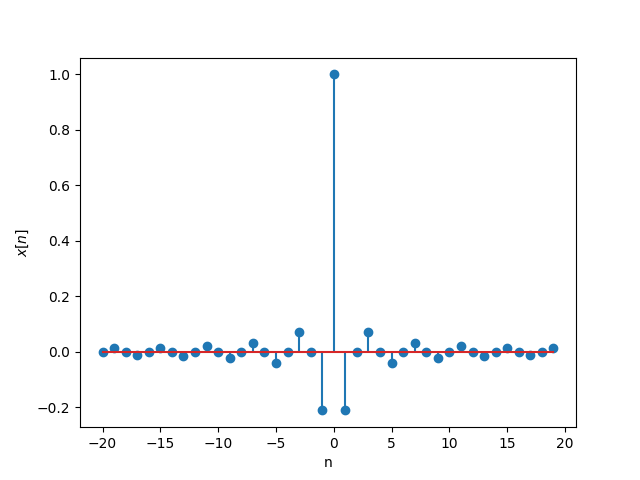

In [15]:
# @title
n = np.arange(-20,20)
x = np.sin(1.5*np.pi*n)/(1.5*np.pi*n)
x[n==0] = 1
plt.figure()
plt.stem(n, x)
plt.xlabel('n')
plt.ylabel('$x[n]$')
plt.show()

---

---

### Exemplo 3

Vamos amostrar o sinal a 1 Hz, abaixo da frequência de Nyquist. O período de amostragem então é $T_s = 1$ s.

$x[n] = x(n) = \mathrm{sinc}(3n) = \frac{\mathrm{sen}(3\pi n)}{3\pi n}$



<ipython-input-14-9477f729ac58>:3: RuntimeWarning: invalid value encountered in divide
  x = np.sin(3*np.pi*n)/(3*np.pi*n)


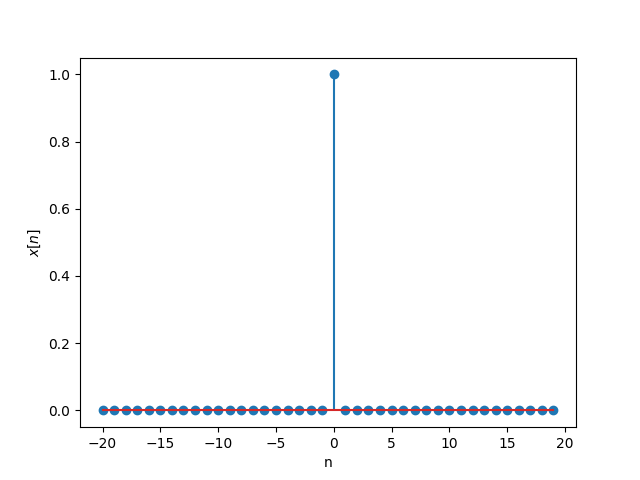

In [14]:
# @title
n = np.arange(-20,20)
x = np.sin(3*np.pi*n)/(3*np.pi*n)
x[n==0] = 1
plt.figure()
plt.stem(n, x)
plt.xlabel('n')
plt.ylabel('$x[n]$')
plt.show()

Como é possível observar, a informação do sinal original foi toda perdida.

## Aliasing

O fenômeno do ***aliasing*** ou **rebatimento** ocorre quando amostramos o sinal abaixo da frequência de Nyquist. Vamos analisar o que acontece quando amostramos um cosseno abaixo da frequência de Nyquist.

Um cosseno de frequência 3 Hz, por exemplo, tem o seguinte espectro (no final do texto é mostrada uma tabela de transformadas de Fourier de alguns sinais):

$X(j\omega) = \pi\delta(\omega+2\pi 3)+\pi\delta(\omega-2\pi 3)$



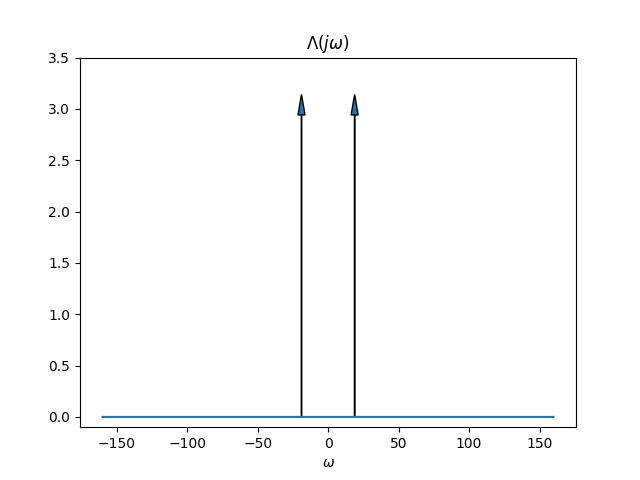

In [ ]:
# @title
omega = np.arange(-1600, 1600)*0.1
plt.figure()
plt.plot(omega, 0*omega)
plt.arrow(6*np.pi,0,0,np.pi-0.2,width=0.3, head_width = 5, head_length=0.2)
plt.arrow(-6*np.pi,0,0,np.pi-0.2,width=0.3, head_width = 5, head_length=0.2)
plt.ylim(-0.1, 3.5)
plt.xlabel('$\omega$')
plt.title('$\Lambda(j\omega)$')
plt.show()

A frequência de Nyquist para esse sinal é 6 Hz. Ao amostrarmos esse cosseno acima da frequência de Nyquist, por exemplo a 10 Hz, o espectro do sinal após a multiplicação com o tre de impulsos fica:

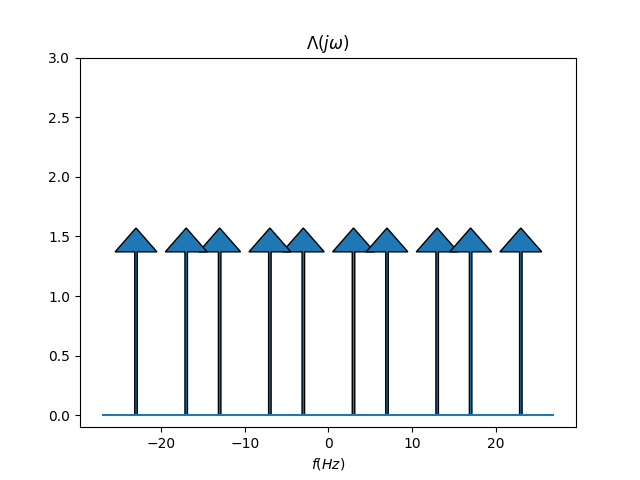

In [ ]:
# @title
omega = np.arange(-270, 270)*0.1
plt.figure()
plt.plot(omega, 0*omega)
plt.arrow(3,0,0,np.pi/2-0.2,width=0.3, head_width = 5, head_length=0.2)
plt.arrow(-3,0,0,np.pi/2-0.2,width=0.3, head_width = 5, head_length=0.2)
plt.arrow(3+10,0,0,np.pi/2-0.2,width=0.3, head_width = 5, head_length=0.2)
plt.arrow(-3+10,0,0,np.pi/2-0.2,width=0.3, head_width = 5, head_length=0.2)
plt.arrow(3-10,0,0,np.pi/2-0.2,width=0.3, head_width = 5, head_length=0.2)
plt.arrow(-3-10,0,0,np.pi/2-0.2,width=0.3, head_width = 5, head_length=0.2)
plt.arrow(3+20,0,0,np.pi/2-0.2,width=0.3, head_width = 5, head_length=0.2)
plt.arrow(-3+20,0,0,np.pi/2-0.2,width=0.3, head_width = 5, head_length=0.2)
plt.arrow(3-20,0,0,np.pi/2-0.2,width=0.3, head_width = 5, head_length=0.2)
plt.arrow(-3-20,0,0,np.pi/2-0.2,width=0.3, head_width = 5, head_length=0.2)
plt.ylim(-0.1, 3)
plt.xlabel('$f (Hz)$')
plt.title('$\Lambda(j\omega)$')
plt.show()

Nesse caso, se passarmos um filtro passa-baixas com frequência de corte 4 Hz, conseguimos recuperar o sinal original.

Porém, se escolhermos um frequência de amostragem menor do que a frequência de Nyquist, por exemplo, 5 Hz, o espectro do sinal multiplicado pelo trem de impulsos fica:

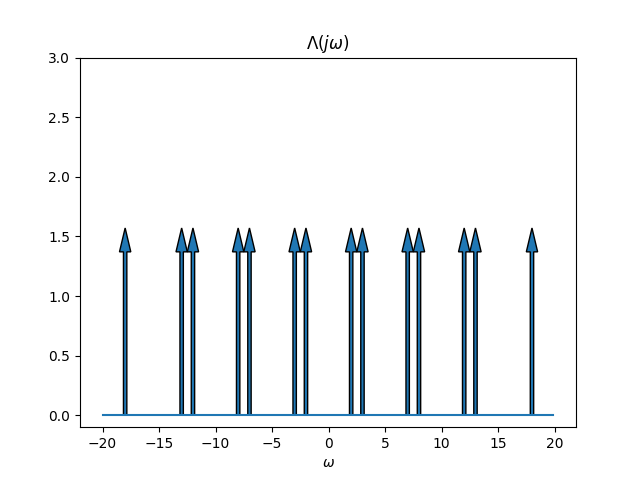

In [ ]:
# @title
omega = np.arange(-200, 200)*0.1
plt.figure()
plt.plot(omega, 0*omega)
plt.arrow(3,0,0,np.pi/2-0.2,width=0.3, head_width = 1, head_length=0.2)
plt.arrow(-3,0,0,np.pi/2-0.2,width=0.3, head_width = 1, head_length=0.2)
plt.arrow(3+5,0,0,np.pi/2-0.2,width=0.3, head_width = 1, head_length=0.2)
plt.arrow(-3+5,0,0,np.pi/2-0.2,width=0.3, head_width = 1, head_length=0.2)
plt.arrow(3-5,0,0,np.pi/2-0.2,width=0.3, head_width = 1, head_length=0.2)
plt.arrow(-3-5,0,0,np.pi/2-0.2,width=0.3, head_width = 1, head_length=0.2)
plt.arrow(3+10,0,0,np.pi/2-0.2,width=0.3, head_width = 1, head_length=0.2)
plt.arrow(-3+10,0,0,np.pi/2-0.2,width=0.3, head_width = 1, head_length=0.2)
plt.arrow(3-10,0,0,np.pi/2-0.2,width=0.3, head_width = 1, head_length=0.2)
plt.arrow(-3-10,0,0,np.pi/2-0.2,width=0.3, head_width = 1, head_length=0.2)
plt.arrow(3+15,0,0,np.pi/2-0.2,width=0.3, head_width = 1, head_length=0.2)
plt.arrow(-3+15,0,0,np.pi/2-0.2,width=0.3, head_width = 1, head_length=0.2)
plt.arrow(3-15,0,0,np.pi/2-0.2,width=0.3, head_width = 1, head_length=0.2)
plt.arrow(-3-15,0,0,np.pi/2-0.2,width=0.3, head_width = 1, head_length=0.2)

plt.ylim(-0.1, 3)
plt.xlabel('$\omega$')
plt.title('$\Lambda(j\omega)$')
plt.show()

O sinal amostrado é mostrado no gráfico abaixo.

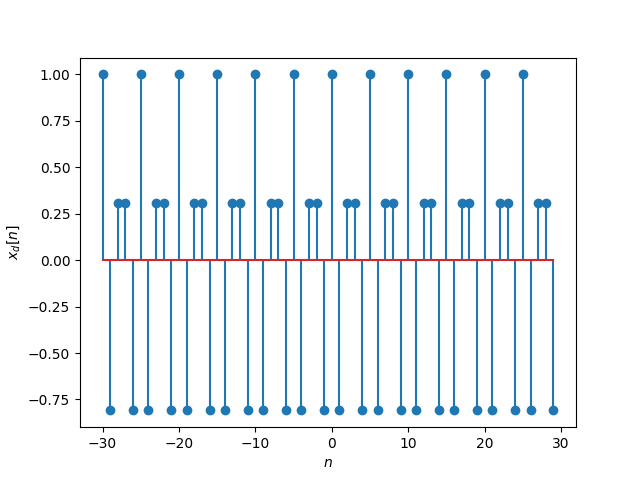

In [ ]:
# @title
n = np.arange(-30,30)
x = np.cos(2*np.pi*3*n*1/5)
plt.figure()
plt.stem(n, x)
plt.xlabel('$n$')
plt.ylabel('$x_d[n]$')
plt.show()

Ao passarmos um filtro passa-baixas com frequência de corte em 4 Hz, o espectro fica:

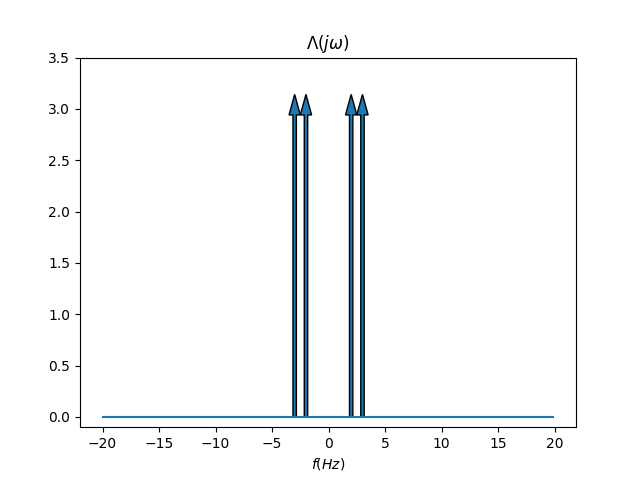

In [ ]:
# @title
omega = np.arange(-200, 200)*0.1
plt.figure()
plt.plot(omega, 0*omega)
plt.arrow(3,0,0,np.pi-0.2,width=0.3, head_width = 1, head_length=0.2)
plt.arrow(-3,0,0,np.pi-0.2,width=0.3, head_width = 1, head_length=0.2)

plt.arrow(-3+5,0,0,np.pi-0.2,width=0.3, head_width = 1, head_length=0.2)
plt.arrow(3-5,0,0,np.pi-0.2,width=0.3, head_width = 1, head_length=0.2)


plt.ylim(-0.1, 3.5)
plt.xlabel('$f (Hz)$')
plt.title('$\Lambda(j\omega)$')
plt.show()

Isso corresponde a dois cossenos, um a 2 Hz e outro a 3 Hz.

$x(t) =  \cos(2\pi 2t)+ \cos(2\pi 3t)$

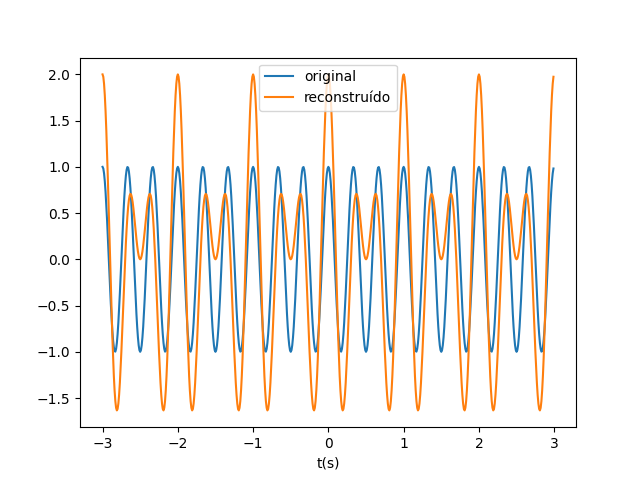

In [16]:
# @title
t = np.arange(-300,300)*0.01
xo = np.cos(2*np.pi*3*t)
xr = (np.cos(2*np.pi*3*t)+np.cos(2*np.pi*2*t))
plt.figure()
plt.plot(t, xo,  label='original')
plt.plot(t, xr, label='reconstruído')
plt.xlabel('t(s)')
plt.legend()
plt.show()

É possível perceber que o sinal reconstruído não é igual ao sinal original. O processo de reconstrução criou uma componente em uma frequência que não existia no sinal original. Isso é que conhecido como aliasing.

## Exercícios

**1)** Calcule a frequência de Nyquist dos seguintes sinais:

a) $x_1(t) = \cos(10t)$

b) $x_2(t) = \mathrm{sinc}(6t)$

c) $x_3(t) = (2t+7)\mathrm{sinc}(5t)$

d) $x_4(t) = \frac{\mathrm{sen}(2\pi t)\mathrm{sen}(6\pi t)}{t^2}$


**2)** Note que ao longo do texto desenvolvido, para recuperar um sinal que foi discretizado, usamos um filtro passa-baixas ideal. Como já visto anteriormente, um filtro ideal  não é realizável, por ser um sistema causal. Como alternativa, devemos utilizar um filtro real. Uma maneira muito comum de se implementar esse filtro passa-baixa é pelo método **retentor de ordem-zero (zero-order hold)**. Ele mantém o valor daquela amostra até a próxima amostra, como visto no gráfico abaixo, e é facilmente implementado eletronicamente:

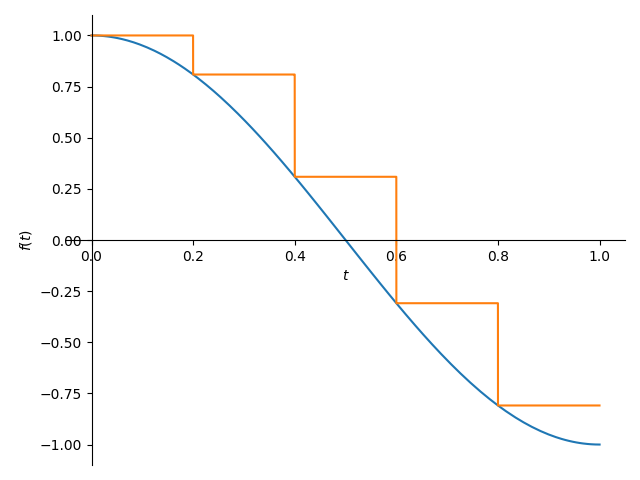

In [ ]:
# @title
t = sym.symbols('t')
x = sym.cos(2*np.pi/2*t)
xh = sym.Piecewise((1, (t<0.2)),
                   (np.cos(2*np.pi/2*0.2), (t<0.4)),
                   (np.cos(2*np.pi/2*0.4), (t<0.6)),
                   (np.cos(2*np.pi/2*0.6), (t<0.8)),
                   (np.cos(2*np.pi/2*0.8), (t<1)))
p1 = sym.plot(x, (t, 0, 1), show=False, label='original')
p2 = sym.plot(xh, (t, 0, 1), show=False, label='retentor de ordem zero')
p1.extend(p2)
p1.show()
plt.legend()

a) Qual a resposta ao impulso do retentor de ordem-zero, para um período de amostragem $T_s$?

b) Qual a resposta em frequência do retentor de ordem zero, para um período de amostragem $T_s$?

c) Vamos recuperar o sinal $x(t) = \cos(\frac{0.2}{Ts}t)$, que foi amostrado com um período de amostragem $T_s$. A primeira repetição do espectro do sinal original acontece em $\omega=\frac{2\pi-0.2}{T_s}$. Um filtro ideal eliminaria completamente essas componentes das repetições do espectros, o que não acontece com um filtro real. Quanto o retentor de ordem zero deixa passar do impulso dessa primeira repetição.?  

**3)** Seja $x(t)$ um sinal com frequência de Nyquist $f_0$. Qual a frequência de Nyquist dos seguintes sinais:

a) $x_1(t) = x(t) - x(t-2)$

b) $x_2(t) = \frac{dx}{dt}$

c) $x_3(t) = x^2(t)$

d) $x_4(t) = x(t)\mathrm{sinc}(t)$

**4)** Um sinal tem o seu espectro entre 0 e 15 kHz. A faixa entre 12 kHz e 15 kHz foi totalmente corrompida por ruído de forma que não pode mais ser recuperada.

a) Qual a frequência de amostragem mínima necessária para que possa ser possível recuperar a parte do sinal que não foi corrompida pelo ruído?

b) Se você usar um filtro passa-baixa ideal com frequência de corte em 12 kHz antes da amostragem, qual a frequência de amostragem mínima necessária para que possa ser possível recuperar a parte do sinal que não foi corrompida pelo ruído?

**5)** Obtenha as primeiras amostras dos seguintes sinais amostrados na frequência $f_s$.

a) $x_1(t) = 3t$, com $f_s=0.5$ Hz

b) $x_2(t) = \cos(2\pi 3t)$, com $f_s=10$ Hz

c) $x_3(t) = 3\mathrm{sinc}(2t)$, com $f_s = 8$ Hz

d) $x_4(t) = 8\cos(2\pi 5t)\mathrm{sen}(4\pi t)$

**6)** Os seguintes sinais foram amostrados a uma frequência de amostragem $f_s$ e depois recuperados usando um filtro passa-baixas ideal com uma frequência de corte $f_c$. Qual foi o sinal recuperado? A frequência utilizada foi adequada?

a) $x_1(t) = \cos(3t)$, com $f_s = 10$ Hz e $f_c = 2$ Hz

b) $x_2(t) = \mathrm{sinc}(2\pi t)$, com $f_s=4$ Hz e $f_c = 1 Hz$

c) $x_3(t) = (4t+6)\cos(2\pi t)$, com $f_s = 5$ Hz e $f_c = 5$ Hz

d) $x_4(t) = \frac{\mathrm{sen}(2\pi t)\mathrm{sen}(2\pi 4t)}{t^2}$

**7)** Considere os sinais abaixo. Para cada um desses sinais, trace um gráfico com as 10 primeiras amostras do sinal, usando uma frequência de amostragem exatamente igual ao dobro da frequência de Nyquist. Depois trace dois outros cossenos em tempo contínuo que teriam as mesmas amostras:

a) $x_1(t) = \cos(2\pi 3 t)$

b) $x_2(t) = \cos(2\pi 5 t)$

a) $x_3(t) = \cos(2\pi 2 t)$

## Referências

- Ulaby, FT e Yagle, AE, Signals & Systems: Theory and Applications, 2018, [ss2.eecs.umich.edu](ss2.eecs.umich.edu)
- Oppenheim, M.  e Willsky, S., Sistemas e Sinais, 2010
- Lathi, BP, Sinais e Sistemas Lineares, 2007



## Apêndice

### Tabela  de transformada de Fourier de alguns sinais

|$$\bf{x(t)}$$                        | $$\bf{X(j\omega)}$$                                                          |
|-------------------------------------|------------------------------------------------------------------------|
|$\delta(t)$                          | 1                                                                      |
|$\delta(t-t_0)$                      | $e^{-j\omega t_0}$                                                     |
|$u(t)$                               | $\frac{1}{j\omega} + \pi\delta(\omega)$                                |
|$u(t-t_0)$                           | $\frac{e^{-j\omega t_0}}{j\omega} + \pi\delta(\omega)$                 |    
|$e^{-\lambda t}u(t)$, com $\lambda>0$    | $\frac{1}{j\omega+\lambda}$                                            |
|$e^{\lambda t}u(-t)$ , com $\lambda>0$   | $\frac{1}{-j\omega+\lambda}$                                            |
|$\cos(b t)$                          |$\pi\delta(\omega-b)+\pi\delta(\omega+b)$                               |
|$\mathrm{sen}(b t)$                  |$j\pi\delta(\omega+b)-j\pi\delta(\omega-b)$                             |
|1                                    | $2\pi\delta(\omega)$                                                   |
|$\mathrm{sinc}(Tt)$                | $\frac{1}{T}\mathrm{rect}\left(\frac{\omega}{2T\pi}\right)$                        |
|$\mathrm{rect}\left(\frac{t}{T}\right)$| $T\mathrm{sinc}\left(\frac{T\omega}{2\pi}\right)$                        |
|$e^{-\lambda\left|t\right|}$, com $\lambda>0$| $\frac{2\lambda}{\lambda^2+\omega^2}$                        |
|$e^{j\omega_0 n}$| $\pi\delta(\omega-\omega_0)$                        |


## Solução dos exercícios

**2)** Resolvido por CAROLINA KAFKA NEVES

a)
Analisando o gráfico, temos que a resposta ao impulso do retentor de ordem zero é dada por pulsos retangulares. Logo:

$h(t)= \mathrm{rect}(\frac{t}{T_s}-\frac{T_s}{2})$

---
b) A resposta em frequência é:

$H(e^{j\omega})= \mathcal{F}(\mathrm{rect}(\frac{t}{T_s})).e^{-j\omega T_s}= T_s\mathrm{sinc}(\frac{T_s\omega}{2\pi}).e^{-j\omega T_s}$

---
c)
Encontrando a resposta em frequência para $\omega= \frac{2\pi-0.2}{T_s}$:

$H(j(\frac{2\pi-0.2}{T_s})= T_s\frac{\mathrm{sen}(\frac{T_s\pi}{2\pi}\frac{2\pi-0.2}{T_s})}{\frac{T_s\pi}{2\pi}\frac{2\pi-0.2}{T_s}}= T_s\frac{\mathrm{sen}(\pi-0.1)}{\pi-0.1}$

Resolvendo $\frac{\mathrm{sen}(\pi-0.1)}{\pi-0.1}$, temos que a resposta em frequência é:

$H(j(\frac{2\pi-0.2}{T_s})= 0.03T_s$

Que representa a quantia que o retentor de ordem zero deixa passar do impulso dessa primeira repetição.

---

**4)** Resolvido por Catherine Gallis

a) **Sem filtro passa-baixa:**

A faixa não corrompida do sinal original vai até 12 kHz. Portanto, a frequência máxima do sinal original é 12 kHz.

- Aplicando o teorema de Nyquist:

$$
f_s \geq 2 \times f_{\text{max}} = 2 \times 12 \, \text{kHz} = 24 \, \text{kHz}
$$

A frequência de amostragem mínima necessária é 24 kHz para que seja possível recuperar a parte do sinal não corrompida pelo ruído.

b) **Com filtro passa-baixa:**

Se usarmos um filtro passa-baixa ideal com frequência de corte em 12 kHz antes da amostragem, estamos limitando as frequências presentes no sinal que chegam ao processo de amostragem.

A frequência máxima do sinal que entra no processo de amostragem agora é 12 kHz.

$$
f_s \geq 2 \times 12 \, \text{kHz} = 24 \, \text{kHz}
$$

Mesmo com o filtro passa-baixa, a frequência de amostragem mínima necessária para recuperar a parte do sinal não corrompida pelo ruído é **24 kHz**.

Tanto no caso sem filtro passa-baixa quanto no caso com filtro passa-baixa, a frequência de amostragem mínima necessária para recuperar a parte não corrompida do sinal é 24 kHz.


**5)** Resolvido por CAROLINA KAFKA NEVES

a) $x_1(t) = 3t$, com $f_s=0.5$ Hz

Como $f_s=0.5$ Hz, então $T_s= 2$ s

Como $x[n]= x(nT_s)$, então temos que as primeiras amostras do sinal $x_1$ são:

$x_1[0]= 3.0.2= 0$                      

$x_1[1]= 3.1.2= 3$

$x_1[2]= 3.2.2= 12$

$x_1[3]= 3.3.2= 18$

$x_1[4]= 3.4.2= 24$

---

b) $x_2(t) = \cos(2\pi 3t)$, com $f_s=10$ Hz

Como $f_s=0.5$ Hz, então $T_s= 2$ s

As primeiras amostras do sinal são dadas por $x_2[n]= \cos(2\pi3nT_s)$:

$x_2[0]= \cos(2\pi3.0.2)= \cos(0)= 1$

$x_2[1]= \cos(2\pi3.1.2)= \cos(12\pi)= 1$

$x_2[2]= \cos(2\pi3.2.2)= \cos(24\pi)= 1$

$x_2[3]= \cos(2\pi3.3.2)= \cos(36\pi)= 1$

$x_2[4]= \cos(2\pi3.4.2)= \cos(48\pi)= 1$

---

c) $x_3(t) = 3\mathrm{sinc}(2t)$, com $f_s = 8$ Hz

Como $f_s=8$ Hz, então $T_s= 0.125$ s

Então, as primeiras amostras do sinal serão:


$x_3[0]= 3\frac{\mathrm{sen}(2\pi.0.125.0)}{2\pi.0.125.0}= 0$

$x_3[1]= 3\frac{\mathrm{sen}(2\pi.1.0.125)}{2\pi.1.0.125}= 2.7$

$x_3[2]= 3\frac{\mathrm{sen}(2\pi.2.0.125)}{2\pi.2.0.125}= 1.9$

$x_3[3]= 3\frac{\mathrm{sen}(2\pi.3.0.125)}{2\pi.3.0.125}= 0.9$

$x_3[4]= 3\frac{\mathrm{sen}(2\pi.4.0.125)}{2\pi.4.0.125}= 0$

---

d) $x_4(t) = 8\cos(2\pi 5t)\mathrm{sen}(4\pi t)$

Como não foi dada uma frequência de amostragem, vamos considerar a mesma frequência da alternativa anterior. Ou seja, temos que $T_s= 0.125$.
Portanto as primeiras amostras do sinal são:


$x_4[0]= 8\cos(2\pi .5.0.125.0)\mathrm{sen}(4\pi .0.125.0)= 0$

$x_4[1]= 8\cos(2\pi .5.1.0.125)\mathrm{sen}(4\pi .1.0.125)= -5.66$

$x_4[2]= 8\cos(2\pi .5.2.0.125)\mathrm{sen}(4\pi .2.0.125)= 0$

$x_4[3]= 8\cos(2\pi .5.3.0.125)\mathrm{sen}(4\pi .3.0.125)= -5.66$

$x_4[4]= 8\cos(2\pi .5.4.0.125)\mathrm{sen}(4\pi .4.0.125)= 0$

---